# **Load Librarry**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# **Load Dataset**

In [3]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_multilabel/Binary_Target_CFeaturesEngineering_Nm_NoDup.csv'

In [4]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

# **Data Splitting and Scaling**

## **Split Features and Target**

In [5]:
# Pisahkan fitur dan target
y = df_main.filter(like='nama_industri_encoded_')
X = df_main.drop(columns=y.columns)

## **Scaling Features**

In [6]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Split Data Train and Data Test**

In [7]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Inisialisasi jumlah kelas
num_classes = len(y_train.columns)

In [9]:
# Mengubah DataFrame menjadi array numpy
y_train = y_train.to_numpy()

In [10]:
# Mengubah DataFrame menjadi array numpy
y_test = y_test.to_numpy()

## **Check Label Distribution**

In [11]:
from collections import Counter

In [12]:
# Menghitung jumlah total sampel
total_samples = len(y_train)

# Menghitung jumlah sampel untuk setiap kelas
label_counts = np.sum(y, axis=0)

# Menampilkan jumlah sampel untuk setiap kelas
print("Label counts in training data:")
for i, count in enumerate(label_counts):
    class_name = f"Class {i+1}"
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}%)")

Label counts in training data:
Class 1: 531 samples (2.02%)
Class 2: 531 samples (2.02%)
Class 3: 523 samples (1.99%)
Class 4: 531 samples (2.02%)
Class 5: 527 samples (2.00%)
Class 6: 530 samples (2.01%)
Class 7: 527 samples (2.00%)
Class 8: 531 samples (2.02%)
Class 9: 530 samples (2.01%)
Class 10: 510 samples (1.94%)
Class 11: 510 samples (1.94%)
Class 12: 531 samples (2.02%)
Class 13: 525 samples (1.99%)
Class 14: 527 samples (2.00%)
Class 15: 466 samples (1.77%)
Class 16: 526 samples (2.00%)
Class 17: 527 samples (2.00%)
Class 18: 531 samples (2.02%)
Class 19: 521 samples (1.98%)
Class 20: 523 samples (1.99%)
Class 21: 517 samples (1.96%)
Class 22: 440 samples (1.67%)
Class 23: 514 samples (1.95%)
Class 24: 523 samples (1.99%)
Class 25: 519 samples (1.97%)
Class 26: 521 samples (1.98%)
Class 27: 531 samples (2.02%)
Class 28: 529 samples (2.01%)
Class 29: 531 samples (2.02%)
Class 30: 525 samples (1.99%)
Class 31: 531 samples (2.02%)
Class 32: 531 samples (2.02%)
Class 33: 531 samp

# **GridsearchCV for Hyperparameter Tuning**

## **Extreme Gradient Boosting Multi-Label Classifier**

In [13]:
# Inisialisasi model
xgboost = XGBClassifier(tree_method="hist", device="cuda")

# Mendapatkan parameter default
paramsXgb = xgboost.get_params()

# Mencetak parameter default
print("Parameter default XGBoostClassifier:")
for param, value in paramsXgb.items():
    print(f"{param}: {value}")

Parameter default XGBoostClassifier:
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: cuda
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: hist
validate_parameters: None
verbosity: None


In [14]:
# Inisialisasi XGBClassifier untuk menggunakan GPU
xgboost = XGBClassifier(tree_method="hist", device="cuda")

# Definisikan parameter grid untuk GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_Xgb = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Latih model menggunakan GridSearchCV
grid_search_Xgb.fit(X_train, y_train)

# Dapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Xgb.best_params_)
print("Skor akurasi terbaik: ", grid_search_Xgb.best_score_)

# Evaluasi model terbaik pada set pengujian
best_model_Xgb = grid_search_Xgb.best_estimator_
y_pred_Xgb = best_model_Xgb.predict(X_test)

# Hitung metrik evaluasi
accuracy_Xgb = accuracy_score(y_test, y_pred_Xgb)
precision_Xgb = precision_score(y_test, y_pred_Xgb, average='macro')
recall_Xgb = recall_score(y_test, y_pred_Xgb, average='macro')
f1_Xgb = f1_score(y_test, y_pred_Xgb, average='macro')

# Tampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Xgb:.4f}")
print(f"Presisi: {precision_Xgb:.4f}")
print(f"Recall: {recall_Xgb:.4f}")
print(f"F1 Score: {f1_Xgb:.4f}")

Parameter terbaik yang ditemukan:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Skor akurasi terbaik:  0.894812781732002

Akurasi set pengujian dengan parameter terbaik: 0.8991
Presisi: 0.9830
Recall: 0.9064
F1 Score: 0.9420


## **Adaptive Boosting Multi-Label Classifier**

In [15]:
# Inisialisasi model
ada = AdaBoostClassifier()

# Mendapatkan parameter default
paramsAda = ada.get_params()

# Mencetak parameter default
print("Parameter default AdaBoostClassifier:")
for param, value in paramsAda.items():
    print(f"{param}: {value}")

Parameter default AdaBoostClassifier:
algorithm: SAMME.R
estimator: None
learning_rate: 1.0
n_estimators: 50
random_state: None


In [16]:
# Inisialisasi model
adaboost = MultiOutputClassifier(AdaBoostClassifier(), n_jobs=-1)

# Mendefinisikan parameter grid untuk pencarian
param_grid_adb = {
    'estimator__n_estimators': [200, 300],
    'estimator__learning_rate': [0.01, 0.1, 1.0],
    'estimator__estimator': [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=2), None],
    'estimator__algorithm': ['SAMME.R']
}


# Menginisialisasi GridSearchCV
grid_search_Ada = GridSearchCV(estimator=adaboost, param_grid=param_grid_adb, cv=5, scoring='accuracy')

# Melatih model GridSearchCV
grid_search_Ada.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Ada.best_params_)
print("Skor akurasi terbaik: ", grid_search_Ada.best_score_)

# Mengevaluasi model terbaik pada set pengujian
best_model_Ada = grid_search_Ada.best_estimator_
y_pred_Ada = best_model_Ada.predict(X_test)

# Menghitung metrik evaluasi
accuracy_Ada = accuracy_score(y_test, y_pred_Ada)
precision_Ada  = precision_score(y_test, y_pred_Ada, average='macro')
recall_Ada  = recall_score(y_test, y_pred_Ada, average='macro')
f1_Ada  = f1_score(y_test, y_pred_Ada, average='macro')

# Menampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Ada:.4f}")
print(f"Precision: {precision_Ada:.4f}")
print(f"Recall: {recall_Ada:.4f}")
print(f"F1 Score: {f1_Ada :.4f}")

Parameter terbaik yang ditemukan:  {'estimator__algorithm': 'SAMME.R', 'estimator__estimator': DecisionTreeClassifier(max_depth=3), 'estimator__learning_rate': 0.1, 'estimator__n_estimators': 200}
Skor akurasi terbaik:  0.8913191300468395

Akurasi set pengujian dengan parameter terbaik: 0.8920
Precision: 0.9769
Recall: 0.9065
F1 Score: 0.9391


## **Decision Tree Multi-Label Classifier**

In [17]:
# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Mendapatkan parameter default
paramsdt = dt.get_params()

# Mencetak parameter default
print("Parameter default AdaBoostClassifier:")
for param, value in paramsdt.items():
    print(f"{param}: {value}")

Parameter default AdaBoostClassifier:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


In [18]:
# Inisialisasi model
dt = MultiOutputClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1)

# Mendefinisikan parameter grid untuk pencarian
param_grid_dt = {
    'estimator__min_samples_split':[2,5,10],
    'estimator__max_depth': [None,1,2 ],
    'estimator__splitter':['best', 'random'],
    'estimator__min_samples_leaf':[1,2,4],
    'estimator__criterion':['gini', 'entropy', 'log_loss']
    }

# Menginisialisasi GridSearchCV
grid_search_Dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Melatih model GridSearchCV
grid_search_Dt.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search_Dt.best_params_)
print("Skor akurasi terbaik: ", grid_search_Dt.best_score_)

# Mengevaluasi model terbaik pada set pengujian
best_model_Dt  = grid_search_Dt.best_estimator_
y_pred_Dt  = best_model_Dt.predict(X_test)

# Menghitung metrik evaluasi
accuracy_Dt = accuracy_score(y_test, y_pred_Dt)
precision_Dt  = precision_score(y_test, y_pred_Dt, average='macro')
recall_Dt  = recall_score(y_test, y_pred_Dt, average='macro')
f1_Dt  = f1_score(y_test, y_pred_Dt, average='macro')

# Menampilkan metrik evaluasi
print(f"\nAkurasi set pengujian dengan parameter terbaik: {accuracy_Dt:.4f}")
print(f"Precision: {precision_Dt:.4f}")
print(f"Recall: {recall_Dt:.4f}")
print(f"F1 Score: {f1_Dt:.4f}")

Parameter terbaik yang ditemukan:  {'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__splitter': 'best'}
Skor akurasi terbaik:  0.8757878040333253

Akurasi set pengujian dengan parameter terbaik: 0.8812
Precision: 0.9635
Recall: 0.9042
F1 Score: 0.9320


## **Best Parameters**

Parameter terbaik yang ditemukan XGB:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}

Parameter terbaik yang ditemukan ADB:  {'estimator__algorithm': 'SAMME.R', 'estimator__estimator': DecisionTreeClassifier(max_depth=3), 'estimator__learning_rate': 0.1, 'estimator__n_estimators': 200}

Parameter terbaik yang ditemukan DTC:  {'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__splitter': 'best'}


In [20]:
# xgb_params = {
#     'colsample_bytree': 0.8,
#     'learning_rate': 0.1,
#     'max_depth': 6,
#     'n_estimators': 200,
#     'subsample': 1.0
# }

# # Inisialisasi model
# best_model_Xgb = XGBClassifier(**xgb_params, tree_method="hist", device="cuda")

In [19]:
# dt_params = {
#     'max_depth': 3
# }

# adb_params = {
#     'algorithm': 'SAMME.R',
#     'n_estimators': 200,
#     'learning_rate': 0.1,
#     'estimator': DecisionTreeClassifier(**dt_params)
# }

# # Inisialisasi model
# best_model_Ada = MultiOutputClassifier(AdaBoostClassifier(**adb_params), n_jobs=-1)

In [21]:
# dt_params = {
#     'criterion': 'entropy',
#     'max_depth': None,
#     'min_samples_leaf': 4,
#     'min_samples_split': 10,
#     'splitter': 'best'
# }

# # Inisialisasi model
# best_model_Dt = DecisionTreeClassifier(**dt_params)

# **Cross Validation Evaluation**

In [22]:
def cross_validation_classification(estimator, X, y, cv, model_name):
    # Definisikan scoring untuk evaluasi
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    # Melakukan cross-validation dan mendapatkan hasil
    results = cross_validate(estimator, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Menghitung rata-rata metrik untuk data pelatihan
    train_accuracy_mean = np.mean(results['train_accuracy'])
    train_precision_mean = np.mean(results['train_precision'])
    train_recall_mean = np.mean(results['train_recall'])
    train_f1_mean = np.mean(results['train_f1'])

    # Menghitung rata-rata metrik untuk data validasi (cross-validation)
    val_accuracy_mean = np.mean(results['test_accuracy'])
    val_precision_mean = np.mean(results['test_precision'])
    val_recall_mean = np.mean(results['test_recall'])
    val_f1_mean = np.mean(results['test_f1'])

    # Membuat dictionary untuk hasil pelatihan
    dataTraincv = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(train_accuracy_mean)],
        'Precision (Train)': ['{:.5f}'.format(train_precision_mean)],
        'Recall (Train)': ['{:.5f}'.format(train_recall_mean)],
        'F1 Score (Train)': ['{:.5f}'.format(train_f1_mean)],
    }

    # Membuat dictionary untuk hasil validasi (cross-validation)
    dataValcv = {
        'Model': [model_name],
        'Accuracy (Val)': ['{:.5f}'.format(val_accuracy_mean)],
        'Precision (Val)': ['{:.5f}'.format(val_precision_mean)],
        'Recall (Val)': ['{:.5f}'.format(val_recall_mean)],
        'F1 Score (Val)': ['{:.5f}'.format(val_f1_mean)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan validasi (cross-validation)
    df_Trcv = pd.DataFrame(dataTraincv)
    df_Valcv = pd.DataFrame(dataValcv)

    return df_Trcv, df_Valcv

In [23]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### **XGBoost Evaluation**

In [24]:
dfXGB_Trcv, dfXGB_Valcv = cross_validation_classification(best_model_Xgb, X, y, kfold, 'Xgboost')

### **AdaBoost Evaluation**

In [25]:
dfADB_Trcv, dfADB_Valcv = cross_validation_classification(best_model_Ada, X, y, kfold, 'AdaBoost')

### **Decision Tree Evaluation**

In [26]:
dfDCT_Trcv, dfDCT_Valcv = cross_validation_classification(best_model_Dt, X, y, kfold, 'DecisionTree')

### **Comparison of CV Evaluation**

In [27]:
df_Trcv = pd.concat([dfXGB_Trcv, dfADB_Trcv, dfDCT_Trcv], ignore_index=True)
df_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Xgboost,0.94532,0.99489,0.95082,0.97182
1,AdaBoost,0.95523,0.99421,0.96215,0.97736
2,DecisionTree,0.90792,0.98532,0.91972,0.95068


In [28]:
df_Valcv = pd.concat([dfXGB_Valcv, dfADB_Valcv, dfDCT_Valcv], ignore_index=True)
df_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Xgboost,0.89926,0.98436,0.90732,0.94280
1,AdaBoost,0.89559,0.98068,0.90729,0.94099
2,DecisionTree,0.88265,0.96727,0.90297,0.93275


# **Learning Curve**

In [29]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        train_size = int(train_size * len(X_train))
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        model.fit(X_train_subset, y_train_subset)

        train_score = model.score(X_train_subset, y_train_subset)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    ax.plot(train_sizes * len(X_train), train_scores, 'o-', color="b", label="Training score")
    ax.plot(train_sizes * len(X_train), test_scores, 'o-', color="orange", label="Testing score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [30]:
def plot_learning_curvecv(model, X, y, cv, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score (CV)")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [31]:
def plot_learning_curves_per_model(model, X, y, X_train, y_train, X_test, y_test, cv):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    plot_learning_curve(model, X_train, y_train, X_test, y_test, ax1)
    plot_learning_curvecv(model, X, y, cv=cv, ax=ax2)
    ax1.set_title(f"Learning Curve - {model.__class__.__name__} (Original)")
    ax2.set_title(f"Learning Curve - {model.__class__.__name__} (Cross Validation)")

    plt.tight_layout()
    plt.show()

### **XGBoost Learning Curve**

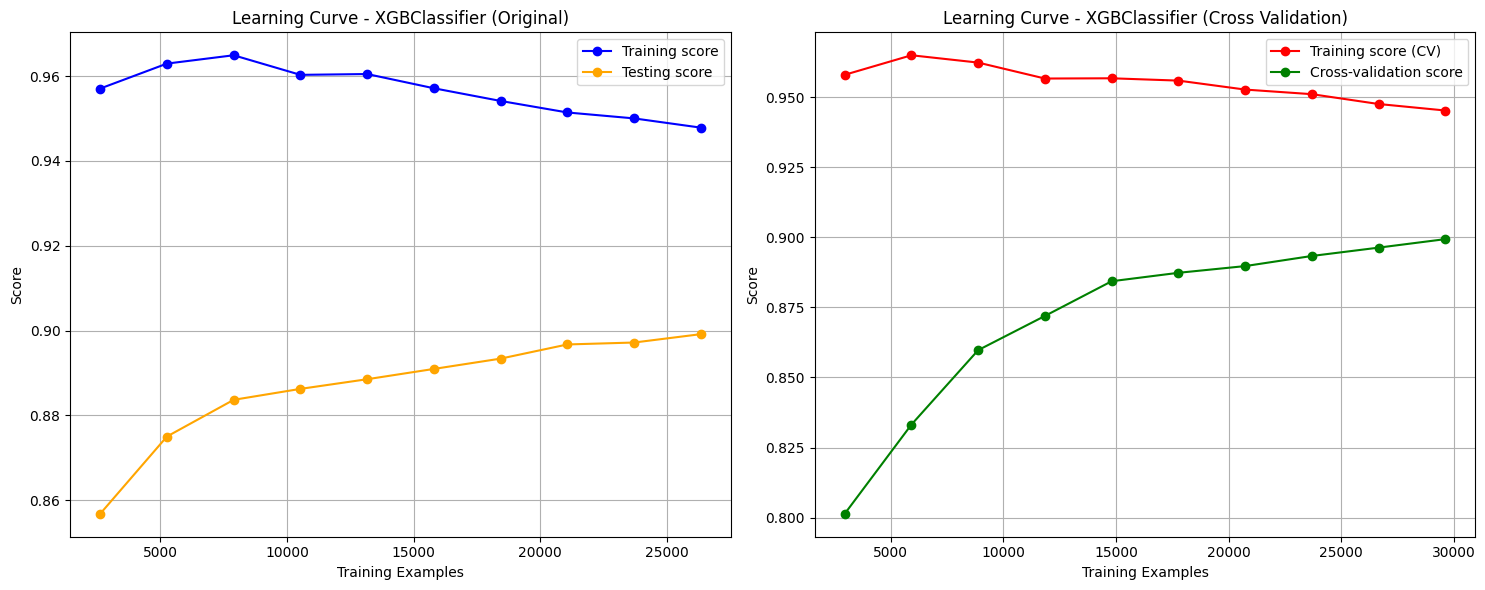

In [32]:
plot_learning_curves_per_model(best_model_Xgb, X, y, X_train, y_train, X_test, y_test, kfold)

### **AdaBoost Learning Curve**

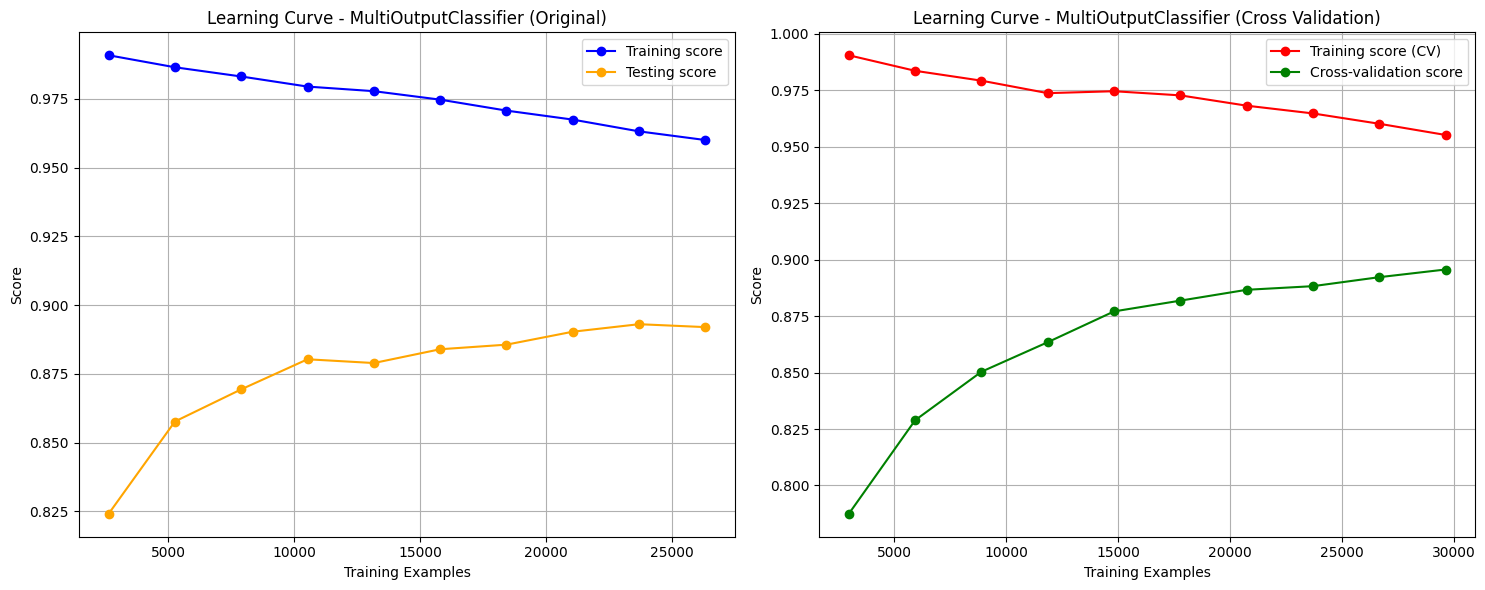

In [33]:
plot_learning_curves_per_model(best_model_Ada, X, y, X_train, y_train, X_test, y_test, kfold)

### **Decision Tree Learning Curve**

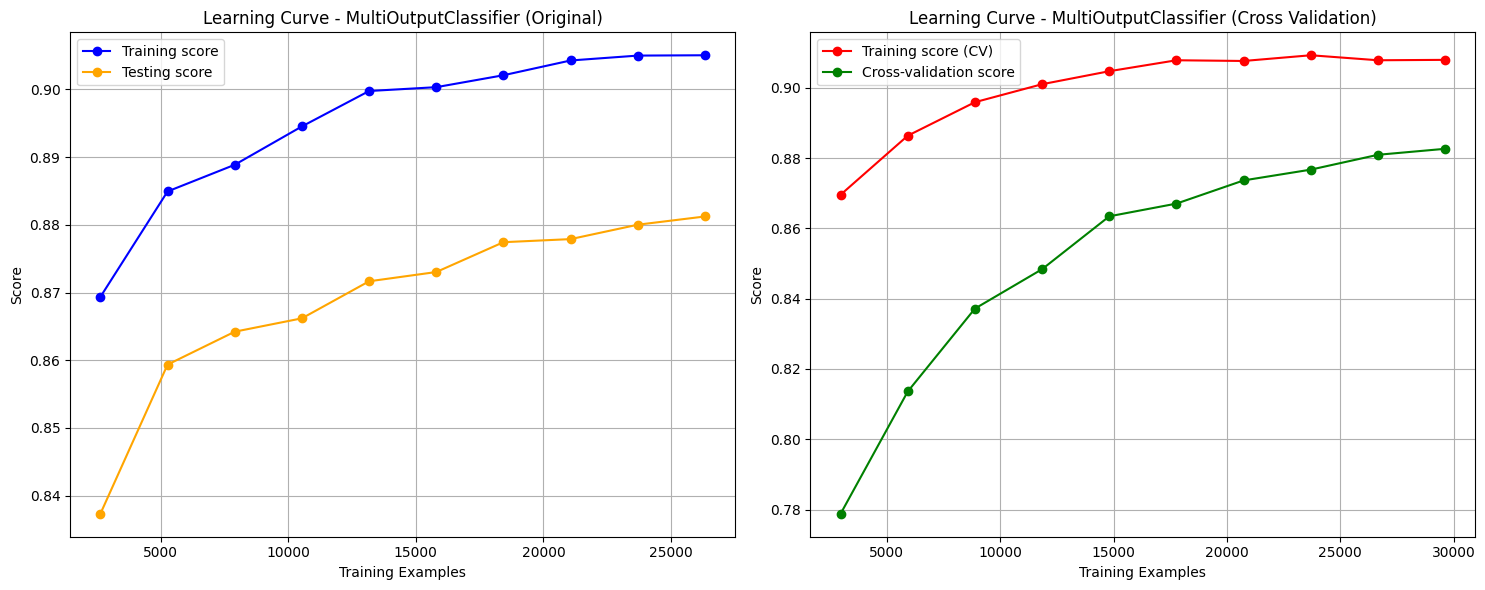

In [34]:
plot_learning_curves_per_model(best_model_Dt, X, y, X_train, y_train, X_test, y_test, kfold)

# **Simpan Model**

In [39]:
# import joblib

# # Misalkan ketiga model telah dilatih dan bernama best_model_Xgb, best_model_Ada, best_model_Dt
# joblib.dump(best_model_Xgb, '../Finpro/model/Xgb_model.pkl')
# joblib.dump(best_model_Ada, '../Finpro/model/Adb_model.pkl')
# joblib.dump(best_model_Dt, '../Finpro/model/Dt_model.pkl')

['../Finpro/model/Dt_model.pkl']

In [40]:
# # Misalkan ketiga model telah dilatih dan bernama best_model_Xgb, best_model_Ada, best_model_Dt
# joblib.dump(best_model_Xgb, '../Finpro/model/Xgb_model.joblib')
# joblib.dump(best_model_Ada, '../Finpro/model/Adb.joblib')
# joblib.dump(best_model_Dt, '../Finpro/model/Dt.joblib')

['../Finpro/model/Dt.joblib']